# Day 2

## (A) More on Control Flow with Loops

In Day 1 Notebook, we learned about **basic numerical and boolean-logical computations in Python** and writing some simple functions. We ended the workshop yesterday with some **basic control flow using `if` and `else` statements**; now we can write codes that act differently, based on some boolean conditions that we code.

Now, we introduce some more control flow statements using **loops**. Loops allow us to **repeat a block of code**.

### While Loop

`while` is also a control flow keyword. It lets you **repeat some codes** inside the `while` statement, *while* a certain condition is met.

![while](./img/while_flowchart.png)

As a simple example, you can do something like:

In [1]:
i = 0
total = 0

# This code sums up all multiples of 3 from i=0 to i=9
while i <= 10:
    total += i
    i += 3

# 0 + 3 + 6 + 9 = 18
print(total)

18


#### Exercise

Have you heard of Newton's method? It is an **iterative algorithm** that can obtain numerical solutions to equations of the form $f(x) = 0$ very quickly. Here is how it works.

First, start with an initial guess $x_0$. Evaluate $f(x_0)$, and see *if* it is equal to (or very close to) $0$. *If* so, you are done! You got lucky, and your initial guess was good enough.

*If* not, you try a better solution given by:

$$ x_1 = x_0 - \frac{f(x_0)}{f'(x_0)} $$

Then, with this better guess $x_1$, try again.

You repeat the above steps until you find a satisfactory solution. i.e. *while* your solution is not good enough, **update your solution** to be $ x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)}$.

Why does this specific update rule actually work?

![newton_method](./img/newton_method_graph.png)

In essence, each update is equivalent to drawing the tangent line to the function $f$ at our current guess, and updating the solution to the point where the tangent line hits $0$.

Use what you have learned so far and the `deriv(f, x, h)` function we wrote above to implement a `newton_method` function.

Judge whether your solution is "close enough" using a parameter `tol` (for tolerance). You solution is good enough if you $\left| f(x_{sol}) \right| <$ `tol` where `tol` is a very small number.

In [2]:
# Numerical derivative code from day 1
# No need to write more code here; just run this cell and define the function
def deriv(f, x, h=1e-6):
    f1 = f(x+h)
    f2 = f(x-h)
    return (f1 - f2) / (2 * h)

In [3]:
def newton_method(f, x0, tol=1e-9):
    ##################################
    # Write your own code here!      #
    ##################################
    sol = x0
    while not -tol < f(sol) < tol:
        sol -= f(sol) / deriv(f, sol)
    return sol

In [4]:
from math import cos
print("This should be close to pi/2")
print(newton_method(cos, 0.5))

print("How does initial guess influence the solution you get,\
 in case your function has multiple roots?")

def some_polynomial(x):
    return (x-3) * (x+2)
# How does initial guess influence the solution you get
# in case your function has multiple roots?
print(newton_method(some_polynomial, 2))
print(newton_method(some_polynomial, 1))
print(newton_method(some_polynomial, 0))
print(newton_method(some_polynomial, -1))

This should be close to pi/2
1.5707963267948966
How does initial guess influence the solution you get, in case your function has multiple roots?
3.0
3.000000000026863
-2.000000000026863
-2.0


#### Exercise

Using the `deriv` and `newton_method` function, can you write an `optimize` function? i.e. a function that takes a function and an initial guess as an input, and returns a nearby minimum/maximum point?

Hint: Do you remember how to use `lambda`?

(This is not a numerically very stable way of doing it... but it works for now.)

In [5]:
def optimize(f, x0, tol=1e-3):
    ##################################
    # Write your own code here!      #
    ##################################
    f_prime = lambda x: deriv(f, x)
    sol = newton_method(f_prime, x0, tol)
    return sol

In [6]:
from math import sin

print("This should be close to pi/2")
print(optimize(sin, 0.8))

def another_polynomial(x):
    return (x-3) ** 2
print("This should be close to 3")
print(optimize(another_polynomial, 1))

def last_polynomial(x):
    return (x-1) ** 3
print("What happens here? Does this function have a minimum or a maximum?")
print(optimize(last_polynomial, 0))

This should be close to pi/2
1.570796308043923
This should be close to 3
2.999999999999929
What happens here? Does this function have a minimum or a maximum?
0.9843751003004408


### For Loop

Another loop control flow keyword is `for`. However, this should really be read as "for each".

A useful function that goes well together with `for` is `range`. See the examples below to understand what `range` does.

In [7]:
sum_1 = 0

# This for-loop iterates through i=0 to i=9
for i in range(10):
    sum_1 += i
print(sum_1)

45


In [8]:
sum_2 = 0
# This for-loop iterates through i=5 to i=14
for i in range(5, 15):
    sum_2 += i
print(sum_2)

95


It is important to note that the iteration **does NOT include the very last value** of `range`.

The Python `range` function also allows for **integer increments other than 1**.

In [9]:
# Iterate from i=0 to i=49 with an increment of 7
for i in range(0, 50, 7):
    print(i)

0
7
14
21
28
35
42
49


#### Exercise

Write your own `factorial` function. This function should take one integer input $n$ and return $n! \equiv \Pi_{i=1}^{n} i$.

In [10]:
def factorial(n):
    ##################################
    # Write your own code here!      #
    ##################################
    prod = 1
    for i in range(1, n+1):
        prod *= i
    return prod

In [11]:
# Test your factorial function with this cell

print(factorial(3))    # 6
print(factorial(6))    # 720
print(factorial(20))   # Factorial grows really fast...

6
720
2432902008176640000


You can also nest control-flow statements within each other. For example, you can have an `if` statement within a `for` loop.

In [12]:
# Iterate from i=0 to i=49
for i in range(0, 50):
    # If i is divisible by 7
    if (i % 7) == 0:
        print(i)

0
7
14
21
28
35
42
49


The above cell does the same thing as a cell earlier on with `range(0, 50, 7)`.

Similarly, you can also do something like this:

In [13]:
# This function prints all positive integers less than or equal to n
# that are not divisible by 3
def not_triple(n):
    for i in range(1, n+1): # Use n+1 as the upper bound to include n
        if (i % 3) != 0:
            print(i)

# Note that it prints 10 as well
not_triple(10)

1
2
4
5
7
8
10


#### Exercise

Write a function `all_primes` that takes one positive integer input `n` and prints all prime numbers less than or equal to `n`.

Hint: Double (nested) `for` loop is a thing.  
Hint: Use a variable `prime` to keep track of whether each number is a prime number or not.  
Hint: $i$ is not a prime if it is divisible by *any* integer in the range $[2, i-1]$.

In [14]:
def all_primes(n):
    ##################################
    # Write your own code here!      #
    ##################################
    for i in range(2, n+1):
        # First, assume all numbers are (potentially) prime
        prime = True
        
        # Iterate through the range from 2 to i-1
        for j in range(2, i-1):
            if (i % j) == 0:    # If you find a divisor of i
                prime = False   # i is no longer a prime
        
        if prime:
            print(i)  # Print i only if it is prime

In [15]:
all_primes(60)

2
3
5
7
11
13
17
19
23
29
31
37
41
43
47
53
59


#### Exercise

Does the term "Riemann Sum" sound familiar to you? Riemann sum is a way to approximate a definite integral (i.e. area under a curve) using finite sum.

As an example, suppose you want to evaluate the integral:

$$ \int_{0}^{2} x^3 \mathrm{d}x $$

using Riemann sum. The exact answer is, of course, $ \left. \frac{x^4}{4} \right|^{2}_{0} = \frac{16}{4} - 0 = 4$.

A very coarse (bad) approximation of the above integral using Riemann sum is represented by the following plot.

![riemann_sum](./img/riemann_sum.png)

If we sum all the areas of 4 blue rectangles, we will get something close to the area under the curve. The Riemann sum in this case should evaluate to:

$$ 0.5 \times 0.25^3 + 0.5 \times 0.75^3 + 0.5 \times 1.25^3 + 0.5 \times 1.75^3
= 3.875 $$

which is actually not that bad.

If we divided the integral range $[0, 2]$ more finely (into more than 4 pieces), we will get an even better answer!

So, let's implement this function using a `for` loop. Your function `riemann_sum` will take 4 inputs: the function `f` you want to integrate, the lower and upper bounds `a` and `b` for the definite integral, and the number of pieces `n` that your Riemann sum will contain. The higher the value of `n`, the higher the accuracy of your approximation. Let `n` be an optional argument with a default value of $100$.

Hint: Start by computing the width of each rectangle.  
Hint: Make sure you evaluate the function `f` at the mid-point of the rectangle to obtain the height of each rectangle.

In [16]:
def riemann_sum(f, a, b, n=100):
    ##################################
    # Write your own code here!      #
    ##################################
    w = (b-a) / n
    result = 0
    for i in range(n):
        rectangle = w * f(a + (i+0.5)*w)
        result += rectangle
    return result

Use the following two cells to test your `riemann_sum` function.

In [17]:
def cube(x):
    return x ** 3

print("This should give an answer improved from 3.875 with n=4")
print( riemann_sum(cube, 0, 2) )
print( riemann_sum(cube, 0, 2, 200) )
print( riemann_sum(cube, 0, 2, 1000) )

from math import cos, pi
print("Do you recall your basic trig.?")
print( riemann_sum(cos, 0, pi/2, 1000))

This should give an answer improved from 3.875 with n=4
3.9998
3.99995
3.999997999999999
Do you recall your basic trig.?
1.0000001028083876


In [18]:
from math import exp, sqrt

def gaussian(x, mu, sigma):
    power = (x - mu) ** 2 / sigma ** 2
    return exp(-power / 2) / (sqrt(2*pi) * sigma)

norm_pdf = lambda x: gaussian(x, 0, 1)

print("For the standard normal distributions:")
print("+/- 1 standard deviation includes 68%")
print( riemann_sum(norm_pdf, -1, 1, 1000))
print("+/- 2 standard deviation includes 95%")
print( riemann_sum(norm_pdf, -2, 2, 1000))
print("+/- 3 standard deviation includes over 99%")
print( riemann_sum(norm_pdf, -3, 3, 1000))

For the standard normal distributions:
+/- 1 standard deviation includes 68%
0.6826895727940137
+/- 2 standard deviation includes 95%
0.954499880079485
+/- 3 standard deviation includes over 99%
0.997300243823125


### Break out of Loops

In the cases of `while` and `for` loops above, it is **clear when to stop iterating** the codes inside the loop; `while` loop stops whenever the boolean condition is no longe `True`, and `for` loop stops whenever we went through all the values generated by the `range` function.

However, this is *not* always the case. Maybe, the condition determining whether to stop the loop or not only becomes known or calculated somewhere mid-way through your loop!

For instance, you might have a while loop running continuously that takes in experimental data and print them out or record them into some file. While you want to keep the loop going anytime the experiment is going on, you might also want to implement some emergency safeties within your code. e.g., If something bad happens, stop everything no matter what, turn off the device, print out a warning statement, etc.

This is called *breaking out* of loops, and is done with `break` keyword.

In [19]:
val = 0
for i in range(50):
    if (val + i) > 200:
        print("Value becomes too big! Breaking the for loop!")
        # This break stops the for loop, even if we haven't reached the end
        break
    else:
        val += i

print(val)

Value becomes too big! Breaking the for loop!
190


## (B) Lists in Python

So far, we have mostly dealt with one variable at a time. However, we often deal with a group of similar data at a given time. For instance, we might want to have a list of all experimental measurements you made, instead of having multiple variables like `var_1`, `var_2`, `var_3`, and so on.

So, the basic way to store variables in a group is through a `list`. A list in Python is a series of values all within square brackets: `["like", "this", "for", "example"]`.

Each element of the list can be accessed with **an index starting from 0**.

In [20]:
squares = [1, 4, 9, 16, 25, 36, 49]

# You can print the whole list with one print statement too
# No need to print one element at a time
print(squares)

# Note that the element indices start from 0
print( squares[0] + squares[3] )
# Negative indices? What does this do?
print( squares[-1] + squares[-3] )

[1, 4, 9, 16, 25, 36, 49]
17
74


You can use `:` to select a range of indices. This is called "**slicing**" in Python.

In [21]:
print( squares[2:5] )
print( squares[4:] )
print( squares[:2] )

[9, 16, 25]
[25, 36, 49]
[1, 4]


You can add an element to the back of the list using `list.append(x)`.

In [22]:
# Start with an empty list
squares = []
for i in range(1, 21):
    squares.append(i * i)
print(squares)

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 324, 361, 400]


You can also remove an element with `list.pop(i)`. This removes the `i`-index element of the list

In [23]:
test_list = [0, 1, 2, 3]

print(test_list.pop(1))
print(test_list)
print(test_list.pop(2))
print(test_list)
print(test_list.pop(0))
print(test_list)
print(test_list.pop(0))
print(test_list)

1
[0, 2, 3]
3
[0, 2]
0
[2]
2
[]


Iterating through each element in a list is super easy:

In [24]:
for n in squares:
    if (n % 2) == 0:
        print(n)

4
16
36
64
100
144
196
256
324
400


#### Exercise

Write a `list_sum` function that takes in one list `numbers` as an input and returns the sum of all elements.

In [25]:
def list_sum(numbers):
    ##################################
    # Write your own code here!      #
    ##################################
    total = 0
    for n in numbers:
        total += n
    return total

In [26]:
data = [0.2, -3.5, 4.2, 1.3, 2.8, 1.5, 3.2]
print("Your list_sum implementation:")
print(list_sum(data))
print("Python built-in sum function:")
print(sum(data))

Your list_sum implementation:
9.7
Python built-in sum function:
9.7


`len(some_list)` gives the length of your list. Hence, we can compute the mean of a list of numbers like the following:

In [27]:
def list_mean(numbers):
    return sum(numbers) / len(numbers)

print(list_mean(data))

1.3857142857142857


#### Exercise

Write a list-wise $\sin(x)$ function. That is, write a function `list_sin` that takes a list of numbers as an input, and returns another list whose element is the element-wise $\sin(x)$ value of the input list.

In [28]:
from math import sin

def list_sin(numbers):
    ##################################
    # Write your own code here!      #
    ##################################
    results = []
    for n in numbers:
        results.append(sin(n))
    return results

Test your code using the cell below. For now, don't worry about the details of how the plotting works.

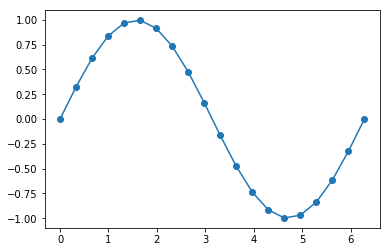

In [30]:
x_list = [0.0, 0.3306939635357677,
 0.6613879270715354,
 0.992081890607303,
 1.3227758541430708,
 1.6534698176788385,
 1.984163781214606,
 2.3148577447503738,
 2.6455517082861415,
 2.9762456718219092,
 3.306939635357677,
 3.6376335988934447,
 3.968327562429212,
 4.29902152596498,
 4.6297154895007475,
 4.960409453036515,
 5.291103416572283,
 5.621797380108051,
 5.9524913436438185,
 6.283185307179586]

sin_x_list = list_sin(x_list)

import matplotlib.pyplot as plt

plt.plot(x_list, sin_x_list, marker='o')
plt.show()

You can also have a list of lists: a nested list.

In [31]:
two_d_list = [ [1, 2, 3, 4], [4, 5, 6, 7], [7, 8, 9, 10] ]
print(two_d_list)
print( len(two_d_list) )
print(two_d_list[1])
print( len(two_d_list[1]) )
print(two_d_list[1][3])

[[1, 2, 3, 4], [4, 5, 6, 7], [7, 8, 9, 10]]
3
[4, 5, 6, 7]
4
7


#### Exercise

Suppose you have a two-dimensional list representing different courses and a student's grades from the course. For example:

```Python
courses = [
    [3, 3.7],
    [4, 4.0],
    [1, 2.0],
    [3, 4.3],
    [4, 3.3]
]
```

This represents 5 different courses. The first course is worth 3 units/credits, and the student got a A-; the second course is worth 4 units, and the student got a A; so on.

Write a function `student_gpa` that takes a list like the above and return the weighted GPA of the student.

In [32]:
def student_gpa(courses):
    ##################################
    # Write your own code here!      #
    ##################################
    gpa = 0
    units = 0
    for course in courses:
        gpa += course[0] * course[1]
        units += course[0]
    gpa /= units
    return gpa

In [33]:
courses = [
    [3, 3.7],
    [4, 3.7],
    [1, 2.0],
    [3, 4.3],
    [4, 3.3]
]

print("What is this student's GPA?")
print( student_gpa(courses) )

What is this student's GPA?
3.6


#### Exercise

Below, I will provide you with a function that returns a (pseudo-) random real number from $-1$ to $1$.

Your job is to create some random points on a real plane that are within a unit circle: a circle of radius $1$ centered at $(0, 0)$. 

More specifically, write a function `points_in_circle` that takes the input `n` which is the number of random points you want to generate. Your output should be a list of lists: `output[0]` should be the list of all $x$-coordinates, and `output[1]` should be the list of all $y$-coordinates. An example output might look like:

```Python
print( points_in_circle(5) )

[
    [-0.3635, 0.7655, -0.1573, 0.0138, 0.4282], # x coordinates
    [-0.5404, 0.0710, 0.7920, 0.7552, 0.6563]   # y coordinates
]
```

In [3]:
from random import uniform

# Use this function to randomly generate a value between -1 and 1
def rand():
    return uniform(-1, 1)

def points_in_circle(n):
    ##################################
    # Write your own code here!      #
    ##################################
    x_list = []
    y_list = []
    while len(x_list) < n:
        x = rand()
        y = rand()
        if (x*x + y*y) <= 1:
            x_list.append(x)
            y_list.append(y)
    return [x_list, y_list]

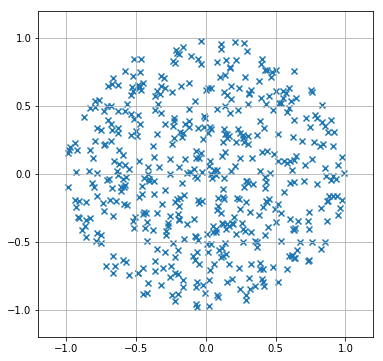

In [35]:
some_points = points_in_circle(500)

plt.figure(figsize=(6, 6))
plt.scatter(some_points[0], some_points[1], marker='x')
plt.xlim([-1.2, 1.2])
plt.ylim([-1.2, 1.2])
plt.grid(True)
plt.show()

(Mostly for fun)

#### Exercise

In the previous exercise, we uniformly sampled points from a square of side length $2$ and only kept the ones within the unit circle. The probability that a randomly chosen point in the square region will fall into a unit circle is proportional to the area of the circle. That is:

$$ \text{Prob.} = \frac{\text{Area of unit circle}}{\text{Area of square}}
= \frac{\pi}{4} $$

Let's use this to approximate the value of $\pi$ numerically. That is, write a function `mc_pi` that takes one large natural number `n` as the input.

In particular, you should generate `n` random points from the square as we did above, and this time, simply count the number of points that fall within the unit circle. The ratio should be represent $\text{Prob.}$ defined above. Return $4 \times \text{the ratio}$.

In [4]:
def mc_pi(n):
    ##################################
    # Write your own code here!      #
    ##################################
    n_in_circle = 0
    for i in range(n):
        x = rand()
        y = rand()
        if (x*x + y*y) <= 1:
            n_in_circle += 1
    return 4 * n_in_circle / n

In [5]:
print(mc_pi(10000000))

3.14153
